
📥 CSV dosyası okunuyor...

📊 En çok geçen beceriler:
           Skill  Count
1            sql    125
0         python     70
2          excel     55
5              r     45
3        tableau     40
6         looker     25
7            aws     25
8      snowflake     15
15      bigquery     15
13         azure     10
4        powerbi      5
9         pandas      0
10         numpy      0
11    matplotlib      0
12  scikit-learn      0
14  google cloud      0


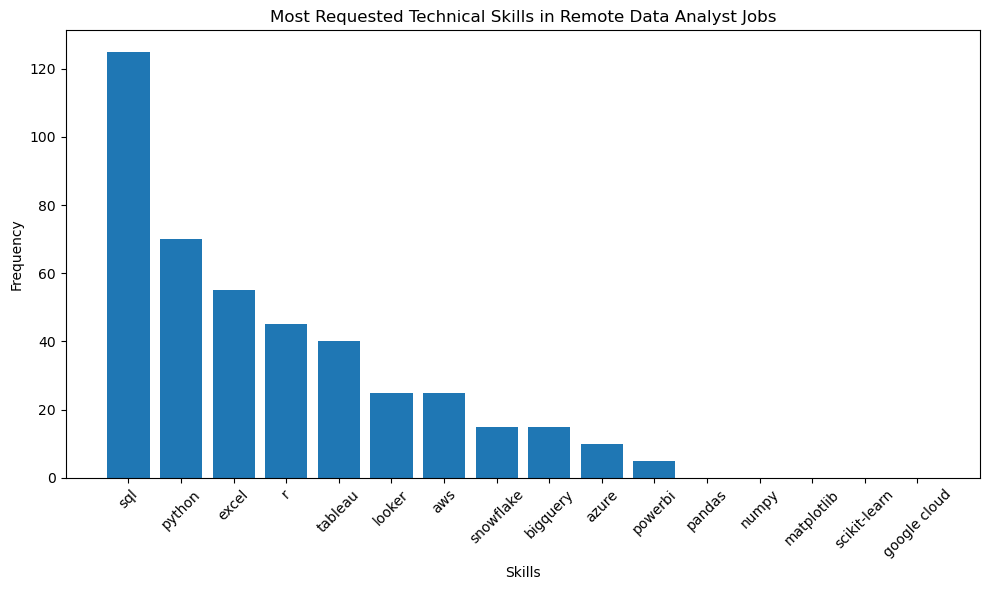

In [4]:
# analyze_skills.py
# --------------------------------------------------
# Bu script, daha önce oluşturduğumuz data_analyst_jobs.csv dosyasını analiz eder.
# Açıklama metinlerinde geçen teknik becerileri sayar ve en çok istenen becerileri bar grafik ile görselleştirir.
# Kod, yorum satırlarıyla birlikte detaylı açıklamalıdır.
# Yazan: [Yavuzcan ÇOLAK]
# Tarih: [09-05-2025]
# --------------------------------------------------

import pandas as pd                  # CSV dosyasını okumak ve tablo işlemleri yapmak için
import re                            # Temizlik işlemleri (noktalama silme vs.) için
import matplotlib.pyplot as plt      # Grafik çizmek için kullanılır

# 1. CSV dosyasını oku
print("\n📥 CSV dosyası okunuyor...")
df = pd.read_csv("data_analyst_jobs.csv")

# 2. Tüm açıklama metinlerini birleştir, küçük harfe çevir
all_text = " ".join(df["description"].dropna().astype(str)).lower()

# 3. Temizlik: Noktalama işaretlerini ve özel karakterleri kaldır
clean_text = re.sub(r"[^a-zA-Z0-9\s]", " ", all_text)

# 4. İzlenecek teknik beceriler listesi
skills = [
    "python", "sql", "excel", "tableau", "powerbi", "r", "looker",
    "aws", "snowflake", "pandas", "numpy", "matplotlib",
    "scikit-learn", "azure", "google cloud", "bigquery"
]

# 5. Her becerinin kaç kez geçtiğini say (tam eşleşme değil, içinde geçenleri sayar)
skill_counts = {}
for skill in skills:
    pattern = r"\b" + re.escape(skill) + r"\b"
    matches = re.findall(pattern, clean_text)
    skill_counts[skill] = len(matches)

# 6. Sonuçları DataFrame'e çevir ve büyükten küçüğe sırala
skills_df = pd.DataFrame(list(skill_counts.items()), columns=["Skill", "Count"])
skills_df = skills_df.sort_values(by="Count", ascending=False)

print("\n📊 En çok geçen beceriler:")
print(skills_df)

# 7. Grafik çizimi
plt.figure(figsize=(10, 6))
plt.bar(skills_df["Skill"], skills_df["Count"])
plt.title("Most Requested Technical Skills in Remote Data Analyst Jobs")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_skills_chart.png")  # Grafik dosyasını kaydet
plt.show()